# Redes Generativas Adversarias
Alrededor de la mitad del año 2014 algunos de los investigadores asociados al departamento de informática de la Universidad de Montreal proponen un nuevo marco de referencia para la estimación de un modelo Generativo basado en redes neuronales, el cual presentarón en el artículo que posteriormente le otorgaría el nombre por el que este marco de referencia será conocido hasta el día de hoy [Generative Adversarial Network](https://arxiv.org/pdf/1406.2661.pdf) *Goodfellow et al* o GAN por sus siglas en inglés como se les conoce popularmente, pero antes que nada se hace necesario responder si quiera brevemente las siguientes cuestiones ¿Qué son los modelos generativos? ¿Qué son los procesos adversarios?

De acuerdo con [developers google](https://developers.google.com/) un [modelo generativo](https://developers.google.com/machine-learning/gan/generative) tiene la capacidad de capturar la probabilidad conjunta P(X,Y) de un grupo de datos lo que le permite en algunos casos crear objetos similares a dicho conjunto. Por otro lado, un proceso adversario en su forma mas simple entrena dos modelos, para el caso específico de las GAN's son llamados `G` y `D`, donde después de un tiempo de optimización de juego **minimax** el entrenamiento se tiende a estabilizar causando que ambos modelos no aprendan mas el uno del otro *Goodfellow et al* .

El marco de referencia propuesto por *Goodfellow et al* consiste en dos redes neuronales: `G` como se le llama al modelo Generativo y `D` que se refiere a un modelo de clasificación que tratará de identificar que imagnes provienen del conjunto de datos real y cuales vienen de G. A este clasificador se le es llamado Modelo Discriminativo *Goodfellow et al*. Posteriormente de definir la arquitectura de ambos, se opta por entrenarlos con dos objetivos contrarios: Por parte de `G` se tratará de **maximizar** la probabilidad de que `D` se equivoque. Por otro lado, `D` buscará **minimizar** la probabilidad de caer en dicho error. Después de una amplia cantidad de epochs el proceso de aprendizaje se estabilizará. De acuerdo con las estimaciones de los autores el **punto óptimo** del problema es que `D` se acercará a un valor constante de $\frac{1}{2}$. Se propone usar modelos de redes neuronales debido a el amplio y fácil uso del método de optimización basado en backpropagation.

De lo descrito por *Goodfellow et al* en su [artículo](https://arxiv.org/pdf/1406.2661.pdf) me gustaría extraer un fragmento con el que trata de explicar de manera ilustrativa el proceso adversario que existen en este framework que proponen: "El modelo generativo puede ser pensado de manera análoga como un equipo de falsificadores tratando de producir modena falsa los cuales la usan sin detección, por otro lado el modelo discriminativo es análogo a la policía que trata de detectar las falsificaciones. La competencia en este juego lleva a ambos equipos a mejorar en su tarea hasta que las falsificaciones de dinero son indetectables de los genuinos" 

## Detalles del entrenamiento
Este proceso inicia con la creación de un vector de ruido denotado por `z` que en algunas ocaciones es llamado *latent vector*. La creación de este vector obedece a una distribución de porbabilidad $p_z(z)$, donde en la mayoría de los casos es una distribución uniforme o Normal. 

Después se representa un mapeo al espacio de datos con $G(z; \theta_g)$ donde la función `G` es diferenciable y es una red neuronal cuyos pesos pertenecen al conjunto $\theta_g$. En paralelo también se define una función `D` diferenciable en forma de una red neuronal, cuya operación es de la siguiente manera $D(x; \theta_d)$ donde su salida es un escalar que **refleja** la probabilidad de que `x` provenga del conjunto de datos reales en lugar de $p_g$ (distribución de los datos generados).

Ya con esta secuencia que también es llamada Fowardpropagation se require los siguientes criterios de optimización: Entrenar `D` para maximizar la probabilidad de que los valores que provengan del dataset los asigne como 1, mientras que los que provengan de la distribución $p_g$ sean asignados como 0. Por otro lado, se entrenará `G` para que `D` asigne $p_g$ como 1. De acuerdo con *Goodfellow et all* la forma matemática de este problema es la siguiente:

$$
min_G~max_D~V(D, G) = \mathbf{E}_{x \sim p_{data}(x)}(logD(x)) + \mathbf{E}_{z \sim p_{z}(z)}(log(1 - D(G(z)))) \tag{1}
$$

Para un mejor entendimiento, recorramos la ecuación parte por parte:
* Lo referente a $\mathbf{E}_{x \sim p_{data}(x)}(...)$ tiene varias partes: $\mathbf{E}$ es el valor esperado o promedio y $x \sim p_{data}(x)$ especifíca el conjunto al que se va a evaluar su promedio, que para este caso vienen siendo todos los datos provenientes de los originales.
* Con respecto a $\mathbf{E}_{z \sim p_{z}(z)}(...)$ Las partes funcionan de igual manera que en el anterior, un único distinto es que este apartado $z \sim p_{z}(z)$ especifica que el conjunto obetivo es `z` en este caso.

La figura 1 de *Goodfellow et al* ilustra de gran manera este proceso. A continuación la presentaremos con su respectiva explicación:
![Proceso de entrenamiento de GAN obtenido de Goodfellow et al](../imagenes/figura_1_Goodfellow_GAN.PNG)

Explicando el código de colores y líneas: 
1. La línea punteada azul corresponde al valor escalar de `D` en el espacio de datos.
2. La línea de puntos negra corresponde a la distribución de probabilidad de los datos reales que son mapeados a un valor escalar (recordedemos que la probabilidada es un valor escalar), esta es la distribución que queremos imitar con nuestro modelo generativo.
3. La linea continua verde correponde la distribución de probabilidad de las imagenes generadas en ese instante de tiempo. No es más si no lo generado por `G`.
4. La línea horizontal `x` es el espacio de datos completo.
5. Las líneas continuas negras que van de la línea horizontal marcada como`z` a la líena horizontal `x` corresponde al mapeo realizado por $G(z)$ en el espacio de datos.

En el instante de tiempo $(a)$ podemos asumir que las dos distribuciones (las generadas y las originales) son cercanas y `D` es un clasificador acercandose a su punto óptimo.

En el instante de tiempo $(b)$ el discriminador `D` llega a su punto optimo, y por medio del aprendizaje de G este se acerca aún mas a la distribución deseada.

En el instante de tiempo $(c)$ el gradiente porvisto por el discriminador `D` va guiando de mejor manera los pesos de `G` para que este pueda mapear eficazmente el *latent vector* con el espacio de datos donde es mas probable encontrar los datos originales.

Por último, en el instante de tiempo $(d)$ el discriminador no puede direccionar mas el gradiente de `G` ya que las dos distribuciones son iguales, lo que hace `D` no pueda identificar la diferencia. Así su valor a partir de este punto siempre será $\frac{1}{2}$

Como vimos en la figura de propositos pedagógicos anterior, `D` es una parte crucial del problema debido a que debe porder diferenciar complemetamente entre los datos reales y los generados, ya que es computacionalmente prohibitivo. Se trará de que `D` sea completamente entrenado antes de que lo haga `G`, para esto se crea un nuevo hiperparámetro denotado como $k$ el cual es la cantidad de pasos de optimización que el algoritmo hace sobre `D` antes de hacer un paso en `G`. El buen ajuste de $k$ causará que `D` se aproxime al punto óptimo y hace que `G` cambie lo suficientemente lento. *Goodfellow et al* presentan el algoritmo en la siguiente imagen.

![Algoritmo de entrenamiento GAN obtenido de Goodfellow et al](../imagenes/Algoritmo_entrenamiento_GAN.PNG)

De acuerdo con *Goodfellow et al* la ecuación $(1)$ en ocaciones no provee suficiente gradiente para que `G` aprende, esto sobre todo en el principio del entrenamiento. Según los autores `D` puede rechazar los ejemplos que tengan alta confiabilidad de resultado, es decir, al principio para `D` es muy claro que los ejemplo generados con muy disntintos a los reales. **Así que en lugar de netrenar a `G` para minimizar $log(1- D(G(z)))$ trate de maximizar $logD(G(z))$**. Esto eventualmente nos llevará al mismo punto de entrenamiento sin embargo `D` proverá un mejor gradiente para `G`.

A continuación, tataremos de imitar de la mejor manera la arquitectura para una GAN usando los conjuntos de datos MNIST y CIFAR-10:

# Configurando nuestro entorno
Lo primero que necesitamos es llamar las librerías, funciones y conjuntos de datos necesarios para realizar la tarea:

In [1]:
import numpy as np
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from helper_func.custom_layers import Maxout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import binary_crossentropy

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
SEED = 777
LEARNING_RATE = .1
BATCH_SIZE = 100
BUFFER = 1000
MOMENTUM = .5
EPOCH = 2
K = 1

Cargamos los datos, para esto vamos a usar el conjunto de npumeros escritos a mano, popularmente llamado [MNIST](http://yann.lecun.com/exdb/mnist/)

In [3]:
mnist = tfds.load('mnist', split='train[:50000]', shuffle_files=True, data_dir='./', as_supervised=True)

Observemos los primeros 4 elementos de nuestro dataset

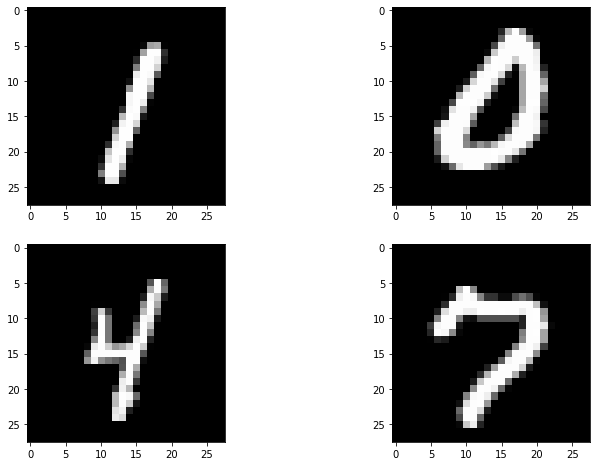

In [4]:
sample = mnist.take(4)

fig = plt.gcf()

for i, x in enumerate(tfds.as_numpy(sample)):
    image, _ = x
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(image[:, :, 0], cmap='gray')

# Adecuando el conjunto de datos
En este apartado adecuaremos el dataset para que sea entrada del Discriminator.

In [5]:
def norm_img(image, label):
    return tf.keras.backend.flatten(tf.cast(image, tf.float32)/255)

In [6]:
mnist = mnist.map(
    norm_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
mnist = mnist.cache()
mnist = mnist.shuffle(BUFFER)
mnist = mnist.batch(BATCH_SIZE)
mnist = mnist.repeat()
mnist = mnist.prefetch(tf.data.experimental.AUTOTUNE)

In [7]:
mnist = iter(mnist)

# Construcción de modelos
Construimos nuestro **Generator** y **Discriminator** la GAN basada en en conjunto de datos MNIST. La arquitectura desarrollada por el investigador la puede encontrar [aqui](https://github.com/goodfeli/adversarial/blob/master/mnist.yaml):

## Generator
Como se dijo el **Generator** es un modelo basado en redes neuronales encargado de aprender la distribución del conjunto de datos real a partir del proceso adversario. Por otra parte, su entrada corresponde a un "latent vector" $z$ el cual tiene una distriución de probabilidad $p_z$ asociada. En este caso el autor elige en vector $z \in \mathbb{R}^{100}$ y $p_z = U(-\sqrt{3}, \sqrt{3})$

In [8]:
def make_generator():
    # Los autores hace una serie de inicializaciones de pesos que se replicarán
    init_kernel_gen = tf.random_uniform_initializer(-.05 , .05, seed=SEED)
    model = Sequential([
        Dense(1200, activation='relu', kernel_initializer=init_kernel_gen, input_shape=(100,)),
        Dense(1200, activation='relu', kernel_initializer=init_kernel_gen),
        Dense(784, activation='sigmoid', kernel_initializer=init_kernel_gen)
    ])
    
    return model
    

In [9]:
gen = make_generator()
gen.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1200)              121200    
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              1441200   
_________________________________________________________________
dense_2 (Dense)              (None, 784)               941584    
Total params: 2,503,984
Trainable params: 2,503,984
Non-trainable params: 0
_________________________________________________________________


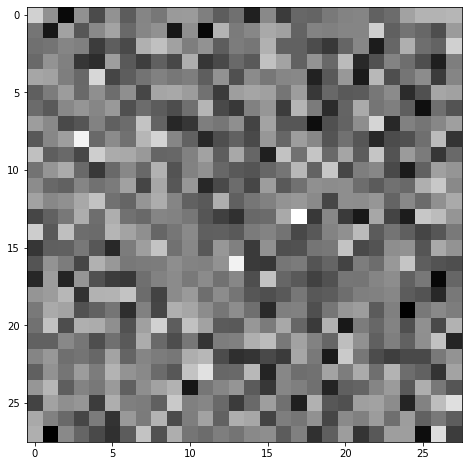

In [10]:
gen = make_generator()
noise = tf.random.uniform([1, 100], minval=-1.*sqrt(3.), maxval=sqrt(3.), seed=SEED)
generated_image = gen(noise, training=False)
generated_image = tf.reshape(generated_image, (28, 28))
plt.imshow(generated_image.numpy(), cmap='gray')

## Discriminator
El **discriminator**, al igual que generator es un modelo basado en redes neuronales. Su función es definir si una entrada es similar o no al conjunto real. Los autores implementan la capa [Maxout](https://arxiv.org/pdf/1302.4389.pdf) propuesta por *Goodfellow et al*, la cual (en una descripción breve) obtiene el máximo de una serie de combinaciones lineales de las entradas y es que para ellos explota de mejor manera las características de la técnica *Dropout*, para mayor información remitace al artículo en el link.

In [11]:
def make_discriminator():
    # El autor hace una serie de inicializaciones de pesos que se replicarán
    init_kernel = tf.random_uniform_initializer(-.005 , .005, seed=SEED)
    model = Sequential([
        Maxout(240, 5, kernel_initializer=init_kernel, input_shape=(784,)),
        Dropout(.8),
        Maxout(240, 5, kernel_initializer=init_kernel),
        Dropout(.5),
        Dense(1, activation='sigmoid', kernel_initializer=init_kernel),
        Dropout(.5),
    ])
    
    return model

In [12]:
disc = make_discriminator()
disc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
maxout (Maxout)              (None, 240)               942000    
_________________________________________________________________
dropout (Dropout)            (None, 240)               0         
_________________________________________________________________
maxout_1 (Maxout)            (None, 240)               289200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 240)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 241       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
Total params: 1,231,441
Trainable params: 1,231,441
Non-trainable params: 0
____________________________________________

In [13]:
disc = make_discriminator()
decision = disc(tf.reshape(generated_image, (1, -1)))
print (decision)

tf.Tensor([[0.49995932]], shape=(1, 1), dtype=float32)


## Definición funciones de costo y optimizadores
En este apartado se definirán las funciones de costo para la actualización de las variables del **Discriminator** y la función del costos del **Generator**. Además se especificará los optimizadores de para el **Generator** y **Discriminator** con la respectiva programación de la tasa de aprendizaje. Empezaremos por este último:   

In [14]:
class ExponentialDecayGANPaper(LearningRateSchedule):
    
    def __init__(self, init_lr=.1, decay_factor = 1.0003, min_lr=1e-6):
        self.init_lr = tf.cast(init_lr, tf.float32)
        self.decay_factor = tf.cast(decay_factor, tf.float32)
        self.min_lr = tf.cast(min_lr, tf.float32)
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        lr = self.init_lr * tf.math.pow(tf.constant(1., dtype=tf.float32)/self.decay_factor, step)
        return tf.cond(lr > self.min_lr, lambda: lr, lambda: self.min_lr)
    
    def get_config(self):
        return {
            'init_lr': self.init_lr,
            'decay_factor': self.decay_factor,
            'min_lr': self.min_lr,
        }        

In [15]:
lr_scheduler = ExponentialDecayGANPaper(init_lr=LEARNING_RATE, decay_factor=1.000004)

In [16]:
gen_opt = SGD(learning_rate=lr_scheduler, momentum=MOMENTUM)
disc_opt = SGD(learning_rate=lr_scheduler, momentum=MOMENTUM)

In [17]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [18]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [19]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(real_output), fake_output)